In [1]:
import numpy as np
from fancyimpute import IterativeSVD
# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[3.08871687e-02 1.88234424e-03 1.01803247e-02 ... 5.38929739e-02
  9.46419202e-02 5.22463452e-02]
 [1.16932050e-02 7.12614266e-04 3.85404779e-03 ... 2.04026986e-02
  3.58293564e-02 1.97793210e-02]
 [1.45083924e-01 8.84179095e-03 4.78192571e-02 ... 2.53147325e-01
  4.44554220e-01 2.45412743e-01]
 ...
 [1.92373479e-01 1.17237392e-02 6.34057625e-02 ... 3.35659735e-01
  5.89454980e-01 3.25404095e-01]
 [2.79266814e-01 1.70192445e-02 9.20455636e-02 ... 4.87274157e-01
  8.55706385e-01 4.72386138e-01]
 [4.19531005e-03 2.55673085e-04 1.38276250e-03 ... 7.32011850e-03
  1.28549238e-02 7.09646194e-03]]

Noisy Matrix (with Homoscedastic Noise):
[[ 1.54221731e-01 -1.23850695e-01  2.31826818e-04 ...  1.76254240e-01
   1.75025755e-01 -3.60487325e-02]
 [-1.44723728e-01 -1.42212834e-01  1.16280053e-01 ...  7.64744073e-03
   8.34183694e-02  3.49384652e-02]
 [ 1.09280139e-01  7.97650848e-02  1.31503352e-01 ...  2.76903131e-01
   4.13446166e-01  1.92738286e-01]
 ...
 [ 1.56

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [5]:

noisy_matrix[1,1]=np.nan
imputed_data = IterativeSVD().fit_transform(noisy_matrix)
 

U, s, Vt = np.linalg.svd(imputed_data , full_matrices=False)
 

mycebmf= cEBMF(data= noisy_matrix)
K=5

[IterativeSVD] Iter 1: observed MAE=0.078254
[IterativeSVD] Iter 2: observed MAE=0.074474
[IterativeSVD] Iter 3: observed MAE=0.067945
[IterativeSVD] Iter 4: observed MAE=0.057108
[IterativeSVD] Iter 5: observed MAE=0.052046
[IterativeSVD] Iter 6: observed MAE=0.052044
[IterativeSVD] Iter 7: observed MAE=0.052044
[IterativeSVD] Iter 8: observed MAE=0.052044
[IterativeSVD] Iter 9: observed MAE=0.052044
[IterativeSVD] Iter 10: observed MAE=0.052044
[IterativeSVD] Iter 11: observed MAE=0.052044
[IterativeSVD] Iter 12: observed MAE=0.052044
[IterativeSVD] Iter 13: observed MAE=0.052044
[IterativeSVD] Iter 14: observed MAE=0.052044
[IterativeSVD] Iter 15: observed MAE=0.052044
[IterativeSVD] Iter 16: observed MAE=0.052044
[IterativeSVD] Iter 17: observed MAE=0.052044
[IterativeSVD] Iter 18: observed MAE=0.052044


In [6]:
K = np.min([K, U.shape[1]])
print(K)

5


In [7]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])
print(mycebmf.K)

The array contains missing values (NaN), generate initialization using iterive svd.
[IterativeSVD] Iter 1: observed MAE=0.078254
[IterativeSVD] Iter 2: observed MAE=0.074474
[IterativeSVD] Iter 3: observed MAE=0.067945
[IterativeSVD] Iter 4: observed MAE=0.057108
[IterativeSVD] Iter 5: observed MAE=0.052046
[IterativeSVD] Iter 6: observed MAE=0.052044
[IterativeSVD] Iter 7: observed MAE=0.052044
[IterativeSVD] Iter 8: observed MAE=0.052044
[IterativeSVD] Iter 9: observed MAE=0.052044
[IterativeSVD] Iter 10: observed MAE=0.052044
[IterativeSVD] Iter 11: observed MAE=0.052044
[IterativeSVD] Iter 12: observed MAE=0.052044
[IterativeSVD] Iter 13: observed MAE=0.052044
[IterativeSVD] Iter 14: observed MAE=0.052044
[IterativeSVD] Iter 15: observed MAE=0.052044
[IterativeSVD] Iter 16: observed MAE=0.052044
[IterativeSVD] Iter 17: observed MAE=0.052044
[IterativeSVD] Iter 18: observed MAE=0.052044
[ 0.13606748  0.06368841 -0.21834304 -0.16732565  0.05135151 -0.07779299
 -0.12246701  0.09681042

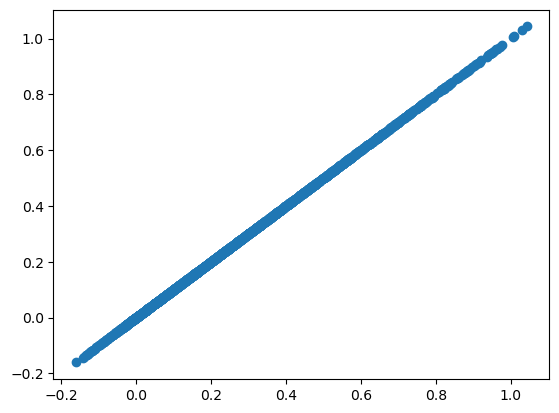

In [8]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

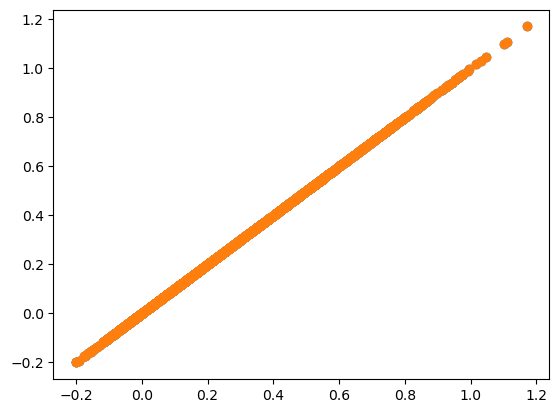

In [9]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [10]:
mycebmf.update_tau()
1/mycebmf.tau

array([[0.00664171, 0.00664171, 0.00664171, ..., 0.00664171, 0.00664171,
        0.00664171],
       [0.00664171, 0.00664171, 0.00664171, ..., 0.00664171, 0.00664171,
        0.00664171],
       [0.00664171, 0.00664171, 0.00664171, ..., 0.00664171, 0.00664171,
        0.00664171],
       ...,
       [0.00664171, 0.00664171, 0.00664171, ..., 0.00664171, 0.00664171,
        0.00664171],
       [0.00664171, 0.00664171, 0.00664171, ..., 0.00664171, 0.00664171,
        0.00664171],
       [0.00664171, 0.00664171, 0.00664171, ..., 0.00664171, 0.00664171,
        0.00664171]])

In [11]:
 
mycebmf.update_loading_factor_k(k=0)

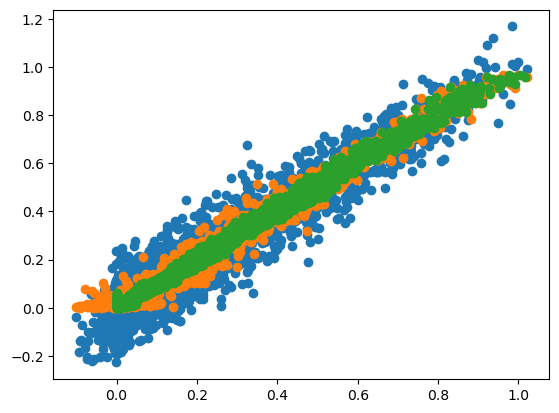

In [12]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

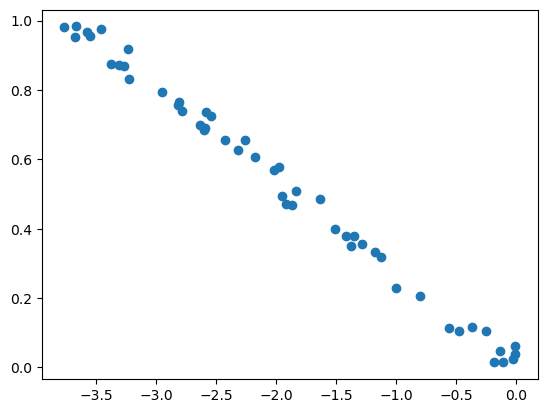

In [13]:
plt.scatter(mycebmf.L[:,0], u)

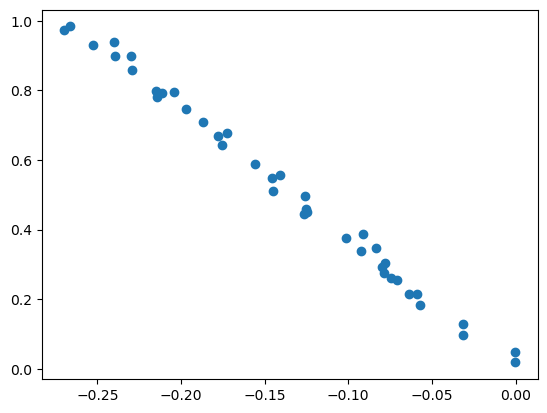

In [14]:
plt.scatter(mycebmf.F[:,0], v)

In [15]:
np.zeros_like(range(10))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
mycebmf.kl_l

array([-170,  -40,  -34,  -29,  -30])

In [17]:
k=1

mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z =mycebmf.Rk,
                                                            nu =mycebmf.F[:,k] ,
                                                            omega=mycebmf.F2[:,k], 
                                                            tau=mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
     
ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     =mycebmf.prior_L,
                      verbose=False
                      )
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2
        
mycebmf.kl_f[k]=  normal_means_loglik(lhat , 
                                           s_l,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )
        
fhat , s_f  = compute_hat_f_and_s_f(Z =mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  ,
                                                            has_nan=mycebmf.has_nan)
ash_obj = ash(betahat   = fhat, 
                      sebetahat = s_f ,
                      prior     = mycebmf.prior_F,
                      verbose=False
                      )
mycebmf.F  [:,k] =ash_obj.post_mean
mycebmf.F2 [:,k] =ash_obj.post_mean2
mycebmf.kl_f[k]=  normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

In [18]:
normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

32.26146228000813

In [19]:
mycebmf.tau

array([[117.96162268, 117.96162268, 117.96162268, ..., 117.96162268,
        117.96162268, 117.96162268],
       [117.96162268, 117.96162268, 117.96162268, ..., 117.96162268,
        117.96162268, 117.96162268],
       [117.96162268, 117.96162268, 117.96162268, ..., 117.96162268,
        117.96162268, 117.96162268],
       ...,
       [117.96162268, 117.96162268, 117.96162268, ..., 117.96162268,
        117.96162268, 117.96162268],
       [117.96162268, 117.96162268, 117.96162268, ..., 117.96162268,
        117.96162268, 117.96162268],
       [117.96162268, 117.96162268, 117.96162268, ..., 117.96162268,
        117.96162268, 117.96162268]])

In [20]:
mycebmf.iter()

print(mycebmf.kl_l)
print(mycebmf.kl_f  )


[-164  -16  -17  -14   -3]
[-139  -11   -9  -10    0]


In [21]:
print( -0.5*np.sum (mycebmf.n_nonmissing* (np.log( 2*np.pi ) - np.log(mycebmf.tau[0,0] + 1e-32)+ 1 )))
print(mycebmf.kl_l  )
print(mycebmf.kl_f  )
print(mycebmf.tau[0,0] )
print( np.sum(mycebmf.kl_l+mycebmf.kl_f)-0.5*np.sum (mycebmf.n_nonmissing* np.log( 2*np.pi ) - np.log(mycebmf.tau[0,0] + 1e-32)+ 1 ))
print(mycebmf.obj)

1819.1449174234574
[-164  -16  -17  -14   -3]
[-139  -11   -9  -10    0]
105.41785365780876
-2218.129161870488
[inf, 1387.5160325104655, 1436.1449174234574]


In [22]:
mycebmf.iter()
print(mycebmf.obj)

[inf, 1387.5160325104655, 1436.1449174234574, 1461.9260075960824]


In [23]:
for i in range(10):
    mycebmf.iter()



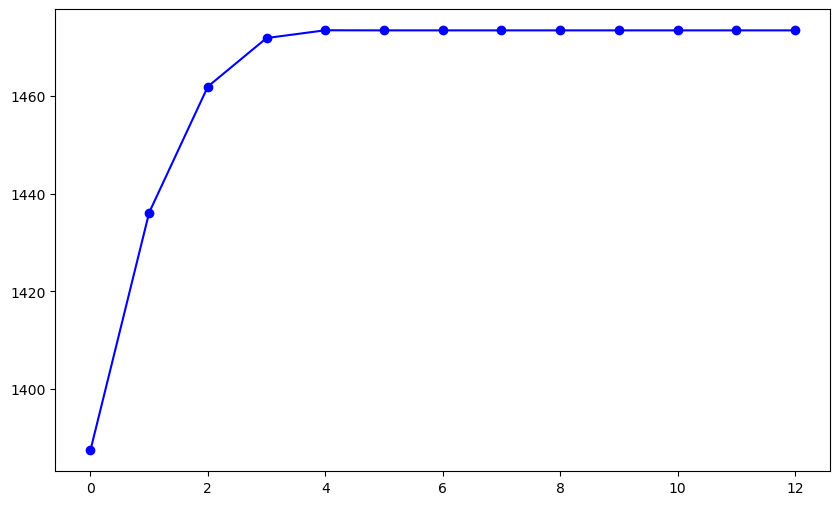

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')